# 6. 贝叶斯学习器

每种算法使用不同的指标来进行决策。比如说，决策树使用的就是叶子节点上占比较多的标签所占的比例（可以通过predict_proba函数），逻辑回归使用sigmoid函数压缩后的似然值（通过predict_proba函数），而SVM使用的 是样本点到决策边界的距离（采用decision_function函数）。但这些指标的本质，其实都是一种“类概率”的表示，我 们可以通过归一化或sigmoid函数将这些指标压缩到0~1之间，让他们表示我们的模型对预测的结果究竟有多大的把握（置信度）。但无论如何，我们都希望使用真正的概率来衡量可能性，因此就有了真正的概率算法：朴素贝叶斯。

朴素贝叶斯分类器是一种直接衡量标签和特征之间的概率关系的有监督学习算法，是一种专注分类的算法。 朴素贝叶斯方法是基于贝叶斯定理的一组有监督学习算法，即“简单”地假设每对特征之间相互独立。 给定一个类别 $ y $ 和一个从 $ x_1 $ 到 $ x_n $ 的相关的特征向量， 贝叶斯定理阐述了以下关系:


$ P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)}{P(x_1, \dots, x_n)} $ 


使用简单(naive)的假设-每对特征之间都相互独立:

$ P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y) , $

对于所有的 :*i* 都成立，这个关系式可以简化为


$ P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}{P(x_1, \dots, x_n)} $


由于在给定的输入中 $ P(x_1, \dots, x_n) $ 是一个常量，我们使用下面的分类规则:


$ P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)\Downarrow\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),$


我们可以使用最大后验概率(Maximum A Posteriori, MAP) 来估计 $ P(y) $ 和 $ P(x_i \mid y) $ ; 前者是训练集中类别 $ y $ 的相对频率。

各种各样的的朴素贝叶斯分类器的差异大部分来自于处理 $ P(x_i \mid y) $ 分布时的所做的假设不同。

尽管其假设过于简单，在很多实际情况下，朴素贝叶斯工作得很好，特别是文档分类和垃圾邮件过滤。这些工作都要求 一个小的训练集来估计必需参数。(至于为什么朴素贝叶斯表现得好的理论原因和它适用于哪些类型的数据，请参见下面的参考。)

相比于其他更复杂的方法，朴素贝叶斯学习器和分类器非常快。 分类条件分布的解耦意味着可以独立单独地把每个特征视为一维分布来估计。这样反过来有助于缓解维度灾难带来的问题。

另一方面，尽管朴素贝叶斯被认为是一种相当不错的分类器，但却不是好的估计器(estimator)，所以不能太过于重视从 `predict_proba` 输出的概率。

> **参考资料**:
>*   H. Zhang (2004). [The optimality of Naive Bayes.](http://www.cs.unb.ca/~hzhang/publications/FLAIRS04ZhangH.pdf) Proc. FLAIRS.


## 6.1 sklearn中的朴素贝叶斯分类器

Sklearn基于这些分布以及这些分布上的概率估计的改进，为我们提供了四个朴素贝叶斯分类器。

| 类 | 含义|
| -  | -   |
|naive_bayes.BernoulliNB | 伯努利分布下的朴素贝叶斯 |
|naive_bayes.GaussianNB  | 高斯分布下的朴素贝叶斯   |
|naive_bayes.MultinomialNB | 多项式分布下的朴素贝叶斯 |
|naive_bayes.ComplementNB|补集朴素贝叶斯           |
|linear_model.BayesianRidge| 贝叶斯岭回归，在参数估计过程中使用贝叶斯回归技术来包括正则化参数|

虽然朴素贝叶斯使用了过于简化的假设，这个分类器在许多实际情况中都运行良好，著名的是文档分类和垃圾邮件过滤。而且由于贝叶斯是从概率角度进行估计，它所需要的样本量比较少，极端情况下甚至我们可以使用1%的数据作为训练集，依然可以得到很好的拟合效果。当然，如果样本量少于特征数目，贝叶斯的效果就会被削弱。

与SVM和随机森林相比，朴素贝叶斯运行速度更快，因为求解$ P(X_i|Y) $ 本质是在每个特征上单独对概率进行计算，然后再求乘积，所以每个特征上的计算可以是独立并且并行的，因此贝叶斯的计算速度比较快。不过相对的，贝叶斯的运行效果不是那么好，所以贝叶斯的接口调用的predict_proba其实也不是总指向真正的分类结果，这一点需要注意。




## 6.2 高斯朴素贝叶斯GaussianNB

class sklearn.naive_bayes.GaussianNB (priors=None, var_smoothing=1e-09)

高斯朴素贝叶斯，通过假设$ P(x_i|Y) $ 是服从高斯分布（也就是正态分布），来估计每个特征下每个类别上的条件概率。对于每个特征下的取值，高斯朴素贝叶斯有如下公式：
     $$  P(x_i|Y) = f(x_i;\mu_y;\sigma_y)*\epsilon \\
                  = \frac{1}{\sqrt{2\pi\sigma^2}}exp(-\frac{(x_i-y_i)^2}{2\sigma_y^2}) 
     $$
     
对于任意一个Y的取值，贝叶斯都以求解最大化$ P(x_i|Y) $ 为目标，这样我们才能够比较在不同标签下我们的样本究竟更靠近哪一个取值。以最大化$ P(x_i|Y) $为目标，高斯朴素贝叶斯会为我们求解公式中的参数$ \sigma_i $和$ \mu_i $。求解出参数后，带入一个$ x_i $的值，就能够得到一个$ P(x_i|Y) $的概率取值。   

这个类包含两个参数：

|参数 |含义|
|-|-|
|prior| 可输入任何类数组结构，形状为（n_classes，）表示类的先验概率。如果指定，则不根据数据调整先验，如果不指定，则自行根据数据计算先验概率$ P(Y) $。
|var_smoothing | 浮点数，可不填（默认值= 1e-9） 在估计方差时，为了追求估计的稳定性，将所有特征的方差中最大的方差以某个比例添加 到估计的方差中。这个比例，由var_smoothing参数控制。|

但在实例化的时候，我们不需要对高斯朴素贝叶斯类输入任何的参数，调用的接口也全部sklearn中比较标准的一些搭配，可以说是一个非常轻量级的类，操作非常容易。但过于简单也意味着贝叶斯没有太多的参数可以调整，因此贝 叶斯算法的成长空间并不是太大，如果贝叶斯算法的效果不是太理想，我们一般都会考虑换模型。




1. 导入需要的库和数据

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

2. 加载数据

   sklearn中的手写数据集

In [15]:
digits = load_digits() #手写数据集
X, y = digits.data, digits.target

In [16]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [17]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=42)

In [18]:
Xtrain.shape,Xtest.shape #64个特征

((1257, 64), (540, 64))

In [19]:
Xtrain[0]

array([ 0.,  0.,  5., 13., 13.,  8.,  0.,  0.,  0.,  0., 16., 11., 13.,
       16.,  6.,  0.,  0.,  1., 16.,  5.,  2., 14.,  9.,  0.,  0.,  0.,
        9., 16., 16., 15.,  0.,  0.,  0.,  0., 10., 16., 14., 14.,  0.,
        0.,  0.,  5., 15.,  4.,  0., 16.,  6.,  0.,  0.,  6., 14.,  7.,
        6., 16.,  4.,  0.,  0.,  0.,  7., 15., 16., 10.,  0.,  0.])

In [20]:
np.unique(Ytrain) #多分类问题，类别是10个

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

3. 建模，探索建模结果

In [21]:
gnb = GaussianNB().fit(Xtrain,Ytrain)

In [22]:
#查看分数
acc_score = gnb.score(Xtest,Ytest) #返回预测的精确性 accuracy
acc_score

0.8518518518518519

In [23]:
#查看预测结果
Y_pred = gnb.predict(Xtest)

In [24]:
#查看预测的概率结果
prob = gnb.predict_proba(Xtest)

In [25]:
prob.shape #每一列对应一个标签类别下的概率

(540, 10)

In [26]:
prob[1,:].sum()

1.0000000000000007

In [27]:
prob[3,:].sum() #每一行的和都是一

1.0

4. 使用混淆矩阵来查看贝叶斯的分类结果

In [28]:
from sklearn.metrics import confusion_matrix 

confusion_matrix(Ytest,Y_pred)

array([[52,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 37,  2,  0,  0,  0,  0,  2,  6,  3],
       [ 0,  3, 31,  0,  0,  0,  1,  0, 12,  0],
       [ 0,  0,  2, 41,  0,  0,  1,  0,  8,  2],
       [ 0,  0,  0,  0, 51,  0,  2,  7,  0,  0],
       [ 0,  0,  0,  1,  0, 62,  1,  2,  0,  0],
       [ 0,  0,  0,  0,  1,  1, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 54,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  2, 39,  0],
       [ 0,  1,  1,  1,  0,  2,  1,  7,  4, 42]], dtype=int64)

## 6.3 探索贝叶斯：朴素贝叶斯分类器所擅长的数据集

高斯朴素贝叶斯擅长什么样的数据集？在此使用三种常见的数据分布：月亮型，环形数据以及二分型数据。

我们采用决策树，SVM和高斯朴素贝叶斯分类器对样本进行分类。

In [29]:
#导入所需要得包
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_moons, make_circles, make_classification 
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB,ComplementNB

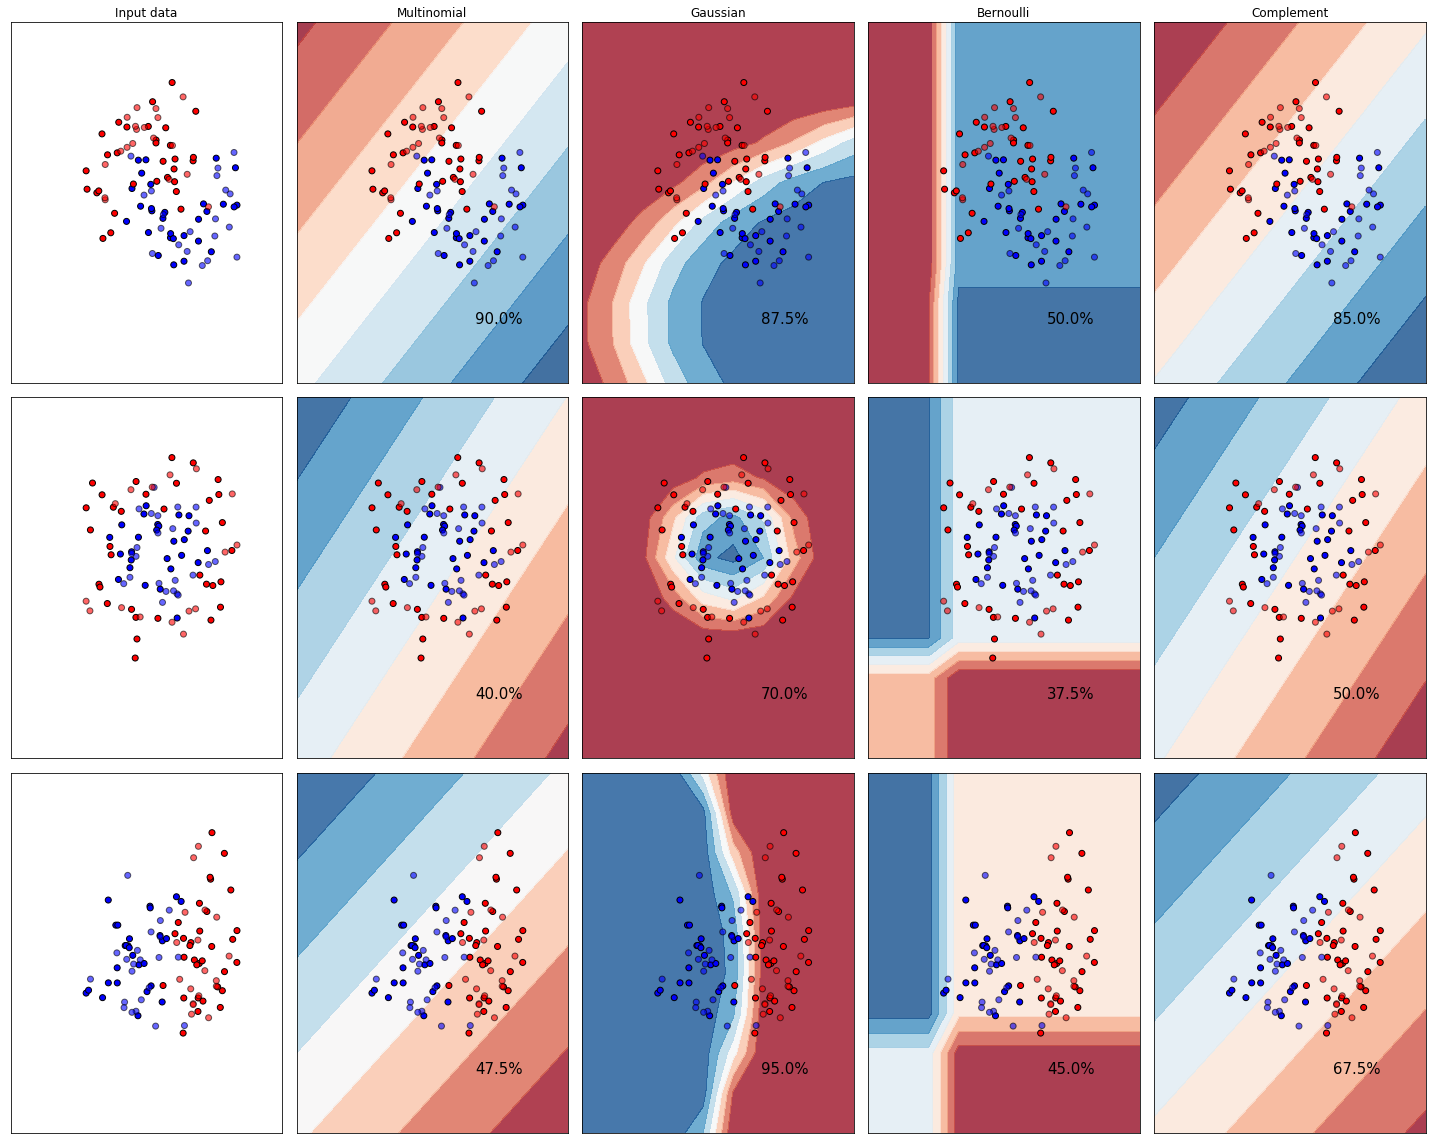

In [30]:

names = ["Multinomial","Gaussian","Bernoulli","Complement"]

MultinomialNB_clf = MultinomialNB()
GaussianNB_clf = GaussianNB()
BernoulliNB_clf = BernoulliNB()
ComplementNB_clf = ComplementNB()

classifiers = [MultinomialNB_clf,GaussianNB_clf,BernoulliNB_clf,ComplementNB_clf]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

nrows=len(datasets)
ncols=len(classifiers) + 1

fig, axes = plt.subplots(nrows, ncols,figsize=(20,16))

#figure = plt.figure(figsize=(6, 9))

i = 1

#第一层循环：在不同的数据集中循环
for ds_index, ds in enumerate(datasets): 
    #在图像中的第一列，放置原数据的分布
    X, y = ds
    X = MinMaxScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
    x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5 
    array1,array2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2),
                                np.arange(x2_min, x2_max, 0.2))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF']) 
    #ax = plt.subplot(len(datasets), 2, i)
    ax = axes[ds_index, 0]
    if ds_index == 0: 
        ax.set_title("Input data")
        
    ax.scatter(X_train[:, 0], X_train[:, 1], 
               c=y_train, cmap=cm_bright,edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], 
               c=y_test, cmap=cm_bright, alpha=0.6,edgecolors='k')
    ax.set_xlim(array1.min(), array1.max()) 
    ax.set_ylim(array2.min(), array2.max()) 
    ax.set_xticks(())
    ax.set_yticks(())
    
    #第二层循环：在不同的核函数中循环
    #从图像的第二列开始，一个个填充分类结果
    for est_idx, model in enumerate(classifiers):
    
        i += 1
        #ax = plt.subplot(len(datasets),est_idx,i)
        ax = axes[ds_index, est_idx + 1]
        
        clf = model.fit(X_train, y_train) 
        score = clf.score(X_test, y_test)
        Z = clf.predict_proba(np.c_[array1.ravel(),array2.ravel()])[:, 1] 
        Z = Z.reshape(array1.shape)
    
        ax.contourf(array1, array2, Z, cmap=cm, alpha=.8)
        ax.scatter(X_train[:, 0], X_train[:, 1], 
                   c=y_train, cmap=cm_bright, edgecolors='k')
        ax.scatter(X_test[:, 0], X_test[:, 1], 
                  c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)

        ax.set_xlim(array1.min(), array1.max()) 
        ax.set_ylim(array2.min(), array2.max()) 
        ax.set_xticks(())
        ax.set_yticks(())

        if ds_index == 0: 
            ax.set_title(names[est_idx])

        ax.text(array1.max() - .3, array2.min() + .3, ('{:.1f}%'.format(score*100)), 
                size=15, horizontalalignment='right')
    i += 1


plt.tight_layout() 
plt.show()


从图上来看，高斯贝叶斯属于比较特殊的一类分类器，其分类效果在二分数据和月亮型数据上表现优秀，但是环形数据不太擅长。我们之前学过的模型中，许多线性模型比如逻辑回归，线性SVM等等，在线性数据集上会绘制直线决策 边界，因此难以对月亮型和环形数据进行区分，但高斯朴素贝叶斯的决策边界是曲线，可以是环形也可以是弧线，所 以尽管贝叶斯本身更加擅长线性可分的二分数据，但朴素贝叶斯在环形数据和月亮型数据上也可以有远远胜过其他线 性模型的表现。

## 6.4 探索贝叶斯：高斯朴素贝叶斯的拟合效果与运算速度

我们已经了解高斯朴素贝叶斯属于分类效果不算顶尖的模型，但我们依然好奇，这个算法在拟合的时候还有哪些特性呢？比如说我们了解，决策树是天生过拟合的模型，而支持向量机是不调参数的情况下就非常接近极限的模型。我们 希望通过绘制高斯朴素贝叶斯的学习曲线与分类树，随机森林和支持向量机的学习曲线的对比，来探索高斯朴素贝叶 斯算法在拟合上的性质。过去绘制学习曲线都是以算法类的某个参数的取值为横坐标，今天我们来使用sklearn中自 带的绘制学习曲线的类learning_curve，在这个类中执行交叉验证并从中获得不同样本量下的训练和测试的准确度。

1. 首先导入需要的模块和库

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB  #高斯朴素贝叶斯
from sklearn.svm import SVC                 #SVM    
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve #画学习曲线的类
from sklearn.model_selection import ShuffleSplit #设定交叉验证模式的类
from time import time
import datetime

2. 定义绘制学习曲线的函数

学习曲线是不同训练集大小，模型在训练集和验证集上的得分变化曲线。也就是以样本数为横坐标，训练和交叉验证集上的得分（如准确率）为纵坐标。learning curve可以帮助我们判断模型现在所处的状态：过拟合（overfiting / high variance） or 欠拟合（underfitting / high bias）
模型欠拟合、过拟合、偏差和方差平衡 时对应的学习曲线如下图所示：

<img src="images/figure6-1.jfif" width = 60% height = 60% div align=left />

（1）左上角的图中训练集和验证集上的曲线能够收敛。在训练集合验证集上准确率相差不大，却都很差。这说明模拟对已知数据和未知都不能进行准确的预测，属于高偏差。这种情况模型很可能是欠拟合。可以针对欠拟合采取对应的措施。
 * 欠拟合措施：
    1. 我们可以增加模型参数（特征），比如，构建更多的特征，减小正则项。
    2. 采用更复杂的模型
    3. 此时通过增加数据量是不起作用的。

（2）右上角的图中模型在训练集上和验证集上的准确率差距很大。说明模型能够很好的拟合已知数据，但是泛化能力很差，属于高方差。模拟很可能过拟合，要采取过拟合对应的措施。
 * 过拟合措施：
   1. 增大训练集，
   2. 降低模型复杂度，增大正则项，
   3. 通过特征选择减少特征数，即做一下feature selection，挑出较好的feature的subset来做training

（3）理想情况是找到偏差和方差都很小的情况，即收敛且误差较小。如右角的图。


sklearn.model_selection的learning_curve，该学习曲线函数返回的是train_sizes，train_scores，test_scores：

    在画训练集的曲线时：横轴为 train_sizes，纵轴为 train_scores_mean；

    画测试集的曲线时：横轴为train_sizes，纵轴为test_scores_mean。

* title：图像的名字。
* cv：默认cv=None，如果需要传入则如下：

    cv : int, 交叉验证生成器或可迭代的可选项，确定交叉验证拆分策略。

         cv的可能输入是：

           - 无，使用默认的3倍交叉验证，

           - 整数，指定折叠数。

           - 要用作交叉验证生成器的对象。

           - 可迭代的yielding训练/测试分裂。

* ShuffleSplit：我们这里设置cv，交叉验证使用ShuffleSplit方法，一共取得100组训练集与测试集，每次的测试集为20%，它返回的是每组训练集与测试集的下标索引，由此可以知道哪些是train，那些是test。

* ylim：tuple, shape (ymin, ymax), 可选的。定义绘制的最小和最大y值，这里是（0.7，1.01）。

* n_jobs : 整数，可选并行运行的作业数（默认值为1）。windows开多线程需要在"__name__"==__main__中运行。

In [32]:
def plot_learning_curve(estimator,title, X, y, 
                        ax, #选择子图
                        ylim=None, #设置纵坐标的取值范围
                        cv=None, #交叉验证
                        n_jobs=None #设定索要使用的线程
                       ):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
                                                            ,cv=cv,n_jobs=n_jobs)    
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid() #显示网格作为背景，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'
            , color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-'
            , color="g",label="Test score")
    ax.legend(loc="best")
    return ax

3. 导入数据，定义循环

In [33]:
digits = load_digits()
X, y = digits.data, digits.target

In [34]:
X.shape

(1797, 64)

In [35]:
X #是一个稀疏矩阵

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

4. 进入循环，绘制学习曲线

In [36]:
title = ["Naive Bayes","DecisionTree","SVM, RBF kernel","RandomForest","Logistic"]
model = [GaussianNB(),DTC(),SVC(gamma=0.001)
         ,RFC(n_estimators=50),LR(C=.1,solver="lbfgs")]
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

Naive Bayes:00:01:859688
DecisionTree:00:02:009357
SVM, RBF kernel:00:10:138981
RandomForest:00:16:076548
Logistic:00:43:991497


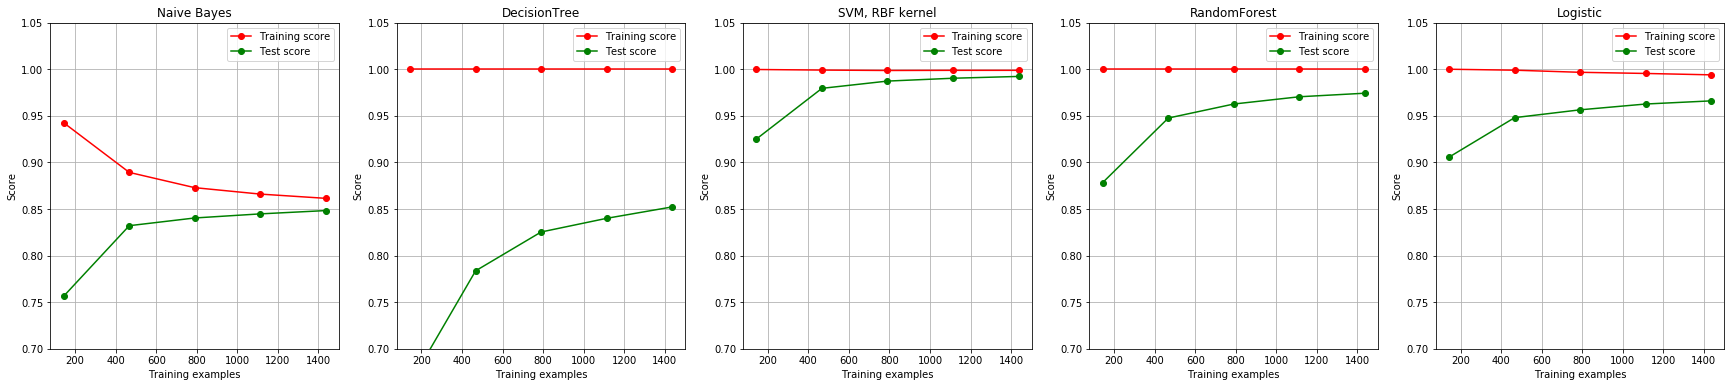

In [38]:
fig, axes = plt.subplots(1,5,figsize=(30,6))
for ind, title_, estimator in zip(range(len(title)),title,model):
    times = time()
    plot_learning_curve(estimator, title_, X, y,
                        ax=axes[ind], ylim = [0.7, 1.05],n_jobs=4, cv=cv)
    print("{}:{}".format(title_,datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f")))
plt.show()

In [30]:
[*zip(range(len(title)),title,model)]

[(0, 'Naive Bayes', GaussianNB(priors=None, var_smoothing=1e-09)),
 (1,
  'DecisionTree',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                         max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort=False,
                         random_state=None, splitter='best')),
 (2,
  'SVM, RBF kernel',
  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)),
 (3,
  'RandomForest',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                         max_depth=None, max_features='auto', max_leaf_nodes=None,
                         min_impurity_dec

三个模型表现出的状态非常有意思。

我们首先返回的结果是**各个算法的运行时间**。可以看到，决策树和贝叶斯不相伯仲（如果你没有发现这个结果，那么可以多运行几次，你会发现贝叶斯和决策树的运行时间逐渐变得差不多）。决策树之所以能够运行非常快速是因为 sklearn中的分类树在选择特征时有所“偷懒”，没有计算全部特征的信息熵而是随机选择了一部分特征来进行计算，因 此速度快可以理解，但我们知道决策树的运算效率随着样本量逐渐增大会越来越慢，但朴素贝叶斯却可以在很少的样 本上获得不错的结果，因此我们可以预料，随着样本量的逐渐增大贝叶斯会逐渐变得比决策树更快。朴素贝叶斯计算 速度远远胜过SVM，随机森林这样复杂的模型，逻辑回归的运行受到最大迭代次数的强烈影响和输入数据的影响（逻辑回归一般在线性数据上运行都比较快，但在这里应该是受到了稀疏矩阵的影响）。因此在运算时间上，朴素贝叶斯 还是十分有优势的。

紧接着，我们来看一下每个算法在**训练集上的拟合**。手写数字数据集是一个较为简单的数据集，决策树，森林，SVC和逻辑回归都成功拟合了100%的准确率，但贝叶斯的最高训练准确率都没有超过95%，这也应证了我们最开始说 的，朴素贝叶斯的分类效果其实不如其他分类器，贝叶斯天生学习能力比较弱。并且我们注意到，随着训练样本量的 逐渐增大，其他模型的训练拟合都保持在100%的水平，但贝叶斯的训练准确率却逐渐下降，这证明样本量越大，贝 叶斯需要学习的东西越多，对训练集的拟合程度也越来越差。反而比较少量的样本可以让贝叶斯有较高的训练准确率。

再来看看**过拟合问题**。首先一眼看到，所有模型在样本量很少的时候都是出于过拟合状态的（训练集上表现好，测试集上表现糟糕），但随着样本的逐渐增多，过拟合问题都逐渐消失了，不过每个模型的处理手段不同。比较强大的分 类器们，比如SVM，随机森林和逻辑回归，是依靠快速升高模型在测试集上的表现来减轻过拟合问题。相对的，决策 树虽然也是通过提高模型在测试集上的表现来减轻过拟合，但随着训练样本的增加，模型在测试集上的表现善生却非 常缓慢。朴素贝叶斯独树一帜，是依赖训练集上的准确率下降，测试集上的准确率上升来逐渐解决过拟合问题。

接下来，看看每个算法在**测试集上的拟合结果，即泛化误差的大小**。随着训练样本数量的上升，所有模型的测试表现都上升了，但贝叶斯和决策树在测试集上的表现远远不如SVM，随机森林和逻辑回归。SVM在训练数据量增大到 1500个样本左右的时候，测试集上的表现已经非常接近100%，而随机森林和逻辑回归的表现也在95%以上，而决策 树和朴素贝叶斯还徘徊在85%左右。但这两个模型所面临的情况十分不同：决策树虽然测试结果不高，但是却依有潜力，因为它的过拟合现象非常严重，我们可以通过减枝来让决策树的测试结果逼近训练结果。然而贝叶斯的过拟合现象在训练样本达到1500左右的时候已经几乎不存在了，训练集上的分数和测试集上的分数非常接近，只有在非 常少的时候测试集上的分数才能够比训练集上的结果更高，所以我们基本可以判断，85%左右就是贝叶斯在这个数据 集上的极限了。可以预测到，如果我们进行调参，那决策树最后应该可以达到90%左右的预测准确率，但贝叶斯却几乎没有潜力了。

在这个对比之下，我们可以看出：贝叶斯是速度很快，但分类效果一般，并且初次训练之后的结果就很接近算法极限的算法，几乎没有调参的余地。也就是说，如果我们追求对概率的预测，并且希望越准确越好，那我们应该先选择逻 辑回归。如果数据十分复杂，或者是稀疏矩阵，那我们坚定地使用贝叶斯。如果我们分类的目标不是要追求对概率的 预测，那我们完全可以先试试看高斯朴素贝叶斯的效果（反正它运算很快速，还不需要太多的样本），如果效果很不 错，我们就很幸运地得到了一个表现优秀又快速的模型。如果我们没有得到比较好的结果，那我们完全可以选择再更 换成更加复杂的模型。

In [31]:
#我输入我的分类器，我们的数据，画图所需要的一系列参数，交叉验证的模式，以及其他可能的参数
#一次性帮助我画出所有的学习曲线

#找出每个图像所需要的横纵坐标 - learning_curve
#设定好用来绘制子图所在的画布，就开始在画布上绘图

def plot_learning_curve(estimator,title, X, y, 
                        ax, #选择子图
                        ylim=None, #设置纵坐标的取值范围
                        cv=None, #交叉验证
                        n_jobs=None #设定索要使用的线程
                       ):
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
                                                            ,cv=cv,n_jobs=n_jobs)    
    ax.set_title(title) #设置标题
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid() #显示网格作为背景，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'
            , color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-'
            , color="g",label="Test score")
    ax.legend(loc="best")
    return ax

In [32]:
clf = GaussianNB()
cv = ShuffleSplit(n_splits=50 #把数据分为多少份
                  ,test_size=0.2 #20% * 50 份的数据会被作为测试集
                  ,random_state=0 #分交叉验证的份数的时候进行的随机抽样的模式
                 )

In [33]:
train_sizes, train_scores, test_scores = learning_curve(clf #分类器，clf
                                                        , X, y #特征矩阵和标签
                                                        ,cv=cv #表示交叉验证模式
                                                        ,n_jobs=4
                                                        #每次运行的时候可以允许算法使用多少运算资源
                                                       )

In [34]:
train_sizes #每次分训练集和测试集建模之后，训练集上的样本数量

array([ 143,  467,  790, 1113, 1437])

In [35]:
train_scores #训练集上的分数

array([[0.93006993, 0.94405594, 0.95104895, 0.87412587, 0.95804196,
        0.99300699, 0.95804196, 0.96503497, 0.95804196, 0.91608392,
        0.93006993, 0.97902098, 0.93706294, 0.90909091, 0.93006993,
        0.94405594, 0.97902098, 0.95804196, 0.96503497, 0.94405594,
        0.95104895, 0.95804196, 0.97202797, 0.9020979 , 0.96503497,
        0.9020979 , 0.83216783, 0.96503497, 0.93006993, 0.95804196,
        0.86013986, 0.94405594, 1.        , 0.93006993, 0.97202797,
        0.94405594, 0.98601399, 0.95804196, 0.97202797, 0.95804196,
        0.97902098, 0.97202797, 0.95804196, 0.95804196, 0.8951049 ,
        0.83216783, 0.93006993, 0.90909091, 0.95804196, 0.95804196],
       [0.90149893, 0.91006424, 0.90578158, 0.86509636, 0.8993576 ,
        0.91862955, 0.89721627, 0.90364026, 0.91220557, 0.86937901,
        0.82441113, 0.91220557, 0.90792291, 0.88008565, 0.88650964,
        0.90792291, 0.8608137 , 0.90364026, 0.88008565, 0.92077088,
        0.90149893, 0.87366167, 0.86295503, 0.8

In [36]:
train_scores.shape

(5, 50)

In [37]:
test_scores.shape

(5, 50)

### 6.5 多项式朴素贝叶斯以及其变化

多项式贝叶斯可能是除了高斯之外，最为人所知的贝叶斯算法了。它也是基于原始的贝叶斯理论，但假设概率分布是服从一个简单多项式分布。多项式分布来源于统计学中的多项式实验，这种实验可以具体解释为：实验包括n次重复 试验，每项试验都有不同的可能结果。在任何给定的试验中，特定结果发生的概率是不变的。


[`MultinomialNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB "sklearn.naive_bayes.MultinomialNB") 实现了服从多项分布数据的朴素贝叶斯算法，也是用于文本分类(这个领域中数据往往以词向量表示，尽管在实践中 tf-idf 向量在预测时表现良好)的两大经典朴素贝叶斯算法之一。 分布参数由每类 $ y $ 的 $ \theta_y = (\theta_{y1},\ldots,\theta_{yn}) $ 向量决定， 式中 $ n $ 是特征的数量(对于文本分类，是词汇量的大小) $ \theta_{yi} $ 是样本中属于类 $ y $ 中特征 $ i $ 概率 $ P(x_i \mid y) $ 。

参数 $ \theta_y $ 使用平滑过的最大似然估计法来估计，即相对频率计数:

$ \hat{\theta}_{yi} = \frac{ N_{yi} + \alpha}{N_y + \alpha n} $

式中$ N_{yi} = \sum_{x \in T} x_i $是训练集T中特征i在类$ y $中出现的次数，$ N_{y} = \sum_{i=1}^{|T|} N_{yi} $ 是类 $ y $ 中出现所有特征的计数总和。

先验平滑因子 $ \alpha \ge 0 $为在学习样本中没有出现的特征而设计，以防在将来的计算中出现0概率输出。 把 $ \alpha = 1 $ 被称为拉普拉斯平滑(Lapalce smoothing)，而 $ \alpha \lt 1 $被称为Lidstone平滑方法(Lidstone smoothing)。

在sklearn中，用来执行多项式朴素贝叶斯的类MultinomialNB包含如下的参数和属性：

class sklearn.naive_bayes.MultinomialNB (alpha=1.0, ﬁt_prior=True, class_prior=None)

| 参数 |
|- |
| alpha : 浮点数, 可不填 (默认为1.0)
拉普拉斯或利德斯通平滑的参数  ，如果设置为0则表示完全没有平滑选项。但是需要注意的是，平滑相当于人 为给概率加上一些噪音，因此  设置得越大，多项式朴素贝叶斯的精确性会越低（虽然影响不是非常大），布里 尔分数也会逐渐升高。|
| ﬁt_prior : 布尔值, 可不填 (默认为True) 是否学习先验概率$ P(Y=c) $。如果设置为false，则不使用先验概率，而使用统一先验概率（uniform prior），即认为每个标签类出现的概率是$ \frac{1}{n_classes} $. |
| class_prior：形似数组的结构，结构为(n_classes, )，可不填（默认为None） 类的先验概率$ P(Y=c) $。如果没有给出具体的先验概率则自动根据数据来进行计算。|

通常我们在实例化多项式朴素贝叶斯的时候，我们会让所有的参数保持默认。先来简单建一个多项式朴素贝叶斯的例子试试看：

1. 导入需要的模块和库

In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.metrics import brier_score_loss

2. 建立数据集

In [39]:
class_1 = 500 
class_2 = 500 #两个类别分别设定500个样本
centers = [[0.0, 0.0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [0.5, 0.5] #设定两个类别的方差
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

#先归一化，保证输入多项式朴素贝叶斯的特征矩阵中不带有负数
X = MinMaxScaler().fit_transform(X)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y
                                                ,test_size=0.3
                                                ,random_state=420)

3. 归一化，确保输入的矩阵不带有负数

In [40]:

#mms = MinMaxScaler().fit(Xtrain) #训练集上来实例化和训练我们的模型
# 为了保证数据中没有负数
#Xtrain_ = mms.transform(Xtrain)

#Xtest_ = mms.transform(Xtest)

4. 建立一个多项式朴素贝叶斯分类器

In [41]:
mnb = MultinomialNB().fit(Xtrain_, Ytrain)

In [42]:
#重要属性：调用根据数据获取的，每个标签类的对数先验概率log(P(Y))
#由于概率永远是在[0,1]之间，因此对数先验概率返回的永远是负值
mnb.class_log_prior_

array([-0.69029411, -0.69600841])

In [43]:
(Ytrain == 0).sum()/Ytrain.shape[0]

0.5014285714285714

In [44]:
mnb.class_log_prior_.shape #永远等于标签中所带的类别数量

(2,)

In [45]:
#可以使用np.exp来查看真正的概率值
np.exp(mnb.class_log_prior_)

array([0.50142857, 0.49857143])

In [46]:
#重要属性：返回一个固定标签类别下的每个特征的对数概率log(P(Xi|y))
mnb.feature_log_prob_

array([[-0.76164788, -0.62903951],
       [-0.72500918, -0.6622691 ]])

In [47]:
mnb.feature_log_prob_.shape #2个特征，2个标签

(2, 2)

In [48]:
#重要属性：在fit时每个标签类别下包含的样本数
#当fit接口中的sample_weight被设置时，该接口返回的值也会受到加权的影响
mnb.class_count_
# 训练集700个样本，351个标签为0样本，349个标签为1样本

array([351., 349.])

In [49]:
mnb.class_count_.shape #返回和我们的标签类别一样的结构

(2,)

In [50]:
#一些传统的接口
mnb.predict(Xtest_)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [52]:
mnb.predict_proba(Xtest_) #每个样本在每个标签取值下的概率

array([[0.49847128, 0.50152872],
       [0.50065987, 0.49934013],
       [0.50122363, 0.49877637],
       [0.50183745, 0.49816255],
       [0.50146433, 0.49853567],
       [0.50153147, 0.49846853],
       [0.50204549, 0.49795451],
       [0.50033124, 0.49966876],
       [0.50105254, 0.49894746],
       [0.50182815, 0.49817185],
       [0.50270707, 0.49729293],
       [0.50133396, 0.49866604],
       [0.49820896, 0.50179104],
       [0.50342829, 0.49657171],
       [0.50099022, 0.49900978],
       [0.49974388, 0.50025612],
       [0.50423879, 0.49576121],
       [0.50449207, 0.49550793],
       [0.49818224, 0.50181776],
       [0.50245485, 0.49754515],
       [0.50393627, 0.49606373],
       [0.50193571, 0.49806429],
       [0.49996152, 0.50003848],
       [0.50460038, 0.49539962],
       [0.50261175, 0.49738825],
       [0.50140163, 0.49859837],
       [0.50332522, 0.49667478],
       [0.50122253, 0.49877747],
       [0.50409939, 0.49590061],
       [0.49998717, 0.50001283],
       [0.

In [53]:
mnb.score(Xtest_,Ytest)

0.5433333333333333

7. 效果不太理想，思考一下多项式贝叶斯的性质，我们能够做点什么呢？

In [54]:
#原数据是连续性数据
#来试试看把Xtiain转换成分类型数据吧
#注意我们的Xtrain没有经过归一化，因为做哑变量之后自然所有的数据就不会又负数了
from sklearn.preprocessing import KBinsDiscretizer #对连续性变量进行分箱
kbs = KBinsDiscretizer(n_bins=10, encode='onehot').fit(Xtrain)

In [55]:
Xtrain_ = kbs.transform(Xtrain)
Xtest_ = kbs.transform(Xtest)

In [56]:
Xtrain_.shape #2个特征中，每个特征分了10个箱所分出来的哑变量

(700, 20)

In [57]:
mnb = MultinomialNB().fit(Xtrain_, Ytrain)

In [58]:
mnb.score(Xtest_,Ytest)

0.9966666666666667

可以看出，多项式朴素贝叶斯的基本操作和代码都非常简单。同样的数据，如果采用哑变量方式的分箱处理，多项式贝叶斯的效果会突飞猛进。作为在文本分类中大放异彩的算法，我们将会在案例中来详细讲解多项式贝叶斯的使用， 并为大家介绍文本分类的更多细节。

### 6.6 伯努利朴素贝叶斯BernoulliNB

多项式朴素贝叶斯可同时处理二项分布（抛硬币）和多项分布（掷骰子），其中二项分布又叫做伯努利分布，它是一种现实中常见，并且拥有很多优越数学性质的分布。因此，既然有着多项式朴素贝叶斯，我们自然也就又专门用来处 理二项分布的朴素贝叶斯：伯努利朴素贝叶斯。

伯努利贝叶斯类BernoulliN假设数据服从多元伯努利分布，并在此基础上应用朴素贝叶斯的训练和分类过程。多元伯努利分布简单来说，就是数据集中可以存在多个特征，但每个特征都是二分类的，可以以布尔变量表示，也可以表示 为{0，1}或者{-1，1}等任意二分类组合。因此，这个类要求将样本转换为二分类特征向量，如果数据本身不是二分类 的，那可以使用类中专门用来二值化的参数binarize来改变数据。

伯努利朴素贝叶斯与多项式朴素贝叶斯非常相似，都常用于处理文本分类数据。但由于伯努利朴素贝叶斯是处理二项分布，所以它更加在意的是“存在与否”，而不是“出现多少次”这样的次数或频率，这是伯努利贝叶斯与多项式贝叶斯 的根本性不同。在文本分类的情况下，伯努利朴素贝叶斯可以使用单词出现向量（而不是单词计数向量）来训练分类 器。文档较短的数据集上，伯努利朴素贝叶斯的效果会更加好。如果时间允许，建议两种模型都试试看。


[`BernoulliNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB "sklearn.naive_bayes.BernoulliNB") 实现了用于多重伯努利分布数据的朴素贝叶斯训练和分类算法，即有多个特征，但每个特征 都假设是一个二元 (Bernoulli, boolean) 变量。 因此，这类算法要求样本以二元值特征向量表示；如果样本含有其他类型的数据， 一个 `BernoulliNB` 实例会将其二值化(取决于 `binarize` 参数)。

伯努利朴素贝叶斯的决策规则基于:

$ P(x_i \mid y) = P(i \mid y) x_i + (1 - P(i \mid y)) (1 - x_i) $ 

与多项分布朴素贝叶斯的规则不同 伯努利朴素贝叶斯明确地惩罚类 $ y $ 中没有出现作为预测因子的特征 $ i $ ，而多项分布分布朴素贝叶斯只是简单地忽略没出现的特征。

在文本分类的例子中，统计词语是否出现的向量(word occurrence vectors)(而非统计词语出现次数的向量(word count vectors))可以用于训练和使用这个分类器。 `BernoulliNB` 可能在一些数据集上表现得更好，特别是那些更短的文档。 如果时间允许，建议对两个模型都进行评估。

> **参考资料**:
>*   C.D. Manning, P. Raghavan and H. Schütze (2008). Introduction to Information Retrieval. Cambridge University Press, pp. 234-265.
>*   A. McCallum and K. Nigam (1998). [A comparison of event models for Naive Bayes text classification.](http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.46.1529) Proc. AAAI/ICML-98 Workshop on Learning for Text Categorization, pp. 41-48.
>*   V. Metsis, I. Androutsopoulos and G. Paliouras (2006). [Spam filtering with Naive Bayes – Which Naive Bayes?](http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.61.5542) 3rd Conf. on Email and Anti-Spam (CEAS).


伯努利朴素贝叶斯类的参数：

class sklearn.naive_bayes.BernoulliNB (alpha=1.0, binarize=0.0, ﬁt_prior=True, class_prior=None)

| 伯努利朴素贝叶斯| 
|   - |
| alpha : 浮点数, 可不填 (默认为1.0) 拉普拉斯或利德斯通平滑的参数  ，如果设置为0则表示完全没有平滑选项。但是需要注意的是，平滑相当于人 为给概率加上一些噪音，因此  设置得越大，多项式朴素贝叶斯的精确性会越低（虽然影响不是非常大），布里 尔分数也会逐渐升高。|
| binarize : 浮点数或None，可不填，默认为0 将特征二值化的阈值，如果设定为None，则会假定说特征已经被二值化完毕 |
| ﬁt_prior : 布尔值, 可不填 (默认为True) 是否学习先验概率$ P(Y=c) $。如果设置为false，则不使用先验概率，而使用统一先验概率（uniform prior），即认为每个标签类出现的概率是$ \frac{1}{n_classes} $。|
| class_prior：形似数组的结构，结构为(n_classes, )，可不填（默认为None） 类的先验概率$ P(Y=c) $。如果没有给出具体的先验概率则自动根据数据来进行计算。

二项分布

In [59]:
from sklearn.naive_bayes import BernoulliNB

In [60]:
#普通来说我们应该使用二值化的类sklearn.preprocessing.Binarizer来将特征一个个二值化
#然而这样效率过低，因此我们选择归一化之后直接设置一个阈值

mms = MinMaxScaler().fit(Xtrain)
Xtrain_ = mms.transform(Xtrain)
Xtest_ = mms.transform(Xtest)

In [61]:
#不设置二值化
bnl_ = BernoulliNB().fit(Xtrain_, Ytrain)
bnl_.score(Xtest_,Ytest)

0.49666666666666665

In [62]:
#设置二值化阈值为0.5
bnl = BernoulliNB(binarize=0.5).fit(Xtrain_, Ytrain)
bnl.score(Xtest_,Ytest)

0.9833333333333333

和多项式贝叶斯一样，伯努利贝叶斯的结果也受到数据结构非常大的影响。因此，根据数据的模样选择贝叶斯，是贝叶斯模型选择中十分重要的一点。

### 6.7 探索贝叶斯：贝叶斯的样本不均衡问题

接下来，我们来探讨一个分类算法永远都逃不过的核心问题：样本不平衡。贝叶斯由于分类效力不算太好，因此对样本不平衡极为敏感，我们接下来就来看一看样本不平衡如何影响了贝叶斯。


1. 导入需要的模块，建立样本不平衡的数据集

In [63]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import brier_score_loss as BS,recall_score,roc_auc_score as AUC

In [64]:
class_1 = 50000 #多数类为50000个样本
class_2 = 500 #少数类为500个样本 1%
centers = [[0.0, 0.0], [5.0, 5.0]] #设定两个类别的中心
clusters_std = [3, 1] #设定两个类别的方差
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

2. 查看所有贝叶斯在样本不平衡数据集上的表现

In [65]:
name = ["Multinomial","Gaussian","Bernoulli"]
models = [MultinomialNB(),GaussianNB(),BernoulliNB()]

In [66]:
for name,clf in zip(name,models):
    #分测试集和训练集
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y
                                                ,test_size=0.3
                                                ,random_state=420)
    #预处理
    if name != "Gaussian":
        kbs = KBinsDiscretizer(n_bins=10, encode='onehot').fit(Xtrain)
        Xtrain = kbs.transform(Xtrain)
        Xtest = kbs.transform(Xtest)
    
    #拟合&结果
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    proba = clf.predict_proba(Xtest)[:,1]
    score = clf.score(Xtest,Ytest) #准确率
    print(name)
    print("\tBrier:{:.3f}".format(BS(Ytest,proba,pos_label=1)))
    print("\tAccuracy:{:.3f}".format(score))
    print("\tRecall:{:.3f}".format(recall_score(Ytest,y_pred)))
    print("\tAUC:{:.3f}".format(AUC(Ytest,proba)))

Multinomial
	Brier:0.007
	Accuracy:0.990
	Recall:0.000
	AUC:0.991
Gaussian
	Brier:0.006
	Accuracy:0.990
	Recall:0.438
	AUC:0.993
Bernoulli
	Brier:0.009
	Accuracy:0.987
	Recall:0.771
	AUC:0.987


从结果上来看，多项式朴素贝叶斯判断出了所有的多数类样本，但放弃了全部的少数类样本，受到样本不均衡问题影响最严重。高斯比多项式在少数类的判断上更加成功一些，至少得到了43.8%的recall。伯努利贝叶斯虽然整体的准确度和布里尔分数不如多项式和高斯朴素贝叶斯和，但至少成功捕捉出了77.1%的少数类。可见，伯努利贝叶斯最能够忍受样本不均衡问题。

可是，伯努利贝叶斯只能用于处理二项分布数据，在现实中，强行将所有的数据都二值化不会永远得到好结果，在我们有多个特征的时候，我们更需要一个个去判断究竟二值化的阈值该取多少才能够让算法的效果优秀。这样做无疑是 非常低效的。那如果我们的目标是捕捉少数类，我们应该怎么办呢？高斯朴素贝叶斯的效果虽然比多项式好，但是也 没有好到可以用来帮助我们捕捉少数类的程度——43.8%，还不如抛硬币的结果。因此，孜孜不倦的统计学家们改进 了朴素贝叶斯算法，修正了包括无法处理样本不平衡在内的传统朴素贝叶斯的众多缺点，得到了新兴贝叶斯算法：补集朴素贝叶斯。

### 6.8 改进多项式朴素贝叶斯：补集朴素贝叶斯ComplementNB

补集朴素贝叶斯（complement naive Bayes，CNB）算法是标准多项式朴素贝叶斯算法的改进。CNB的发明小组创造出CNB的初衷是为了解决贝叶斯中的“朴素”假设带来的各种问题，他们希望能够创造出数学方法以逃避朴素贝叶斯 中的朴素假设，让算法能够不去关心所有特征之间是否是条件独立的。以此为基础，他们创造出了能够解决样本不平 衡问题，并且能够一定程度上忽略朴素假设的补集朴素贝叶斯。在实验中，CNB的参数估计已经被证明比普通多项式 朴素贝叶斯更稳定，并且它特别适合于样本不平衡的数据集。有时候，CNB在文本分类任务上的表现有时能够优于多 项式朴素贝叶斯，因此现在补集朴素贝叶斯也开始逐渐流行。


[`ComplementNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html#sklearn.naive_bayes.ComplementNB)实现了补充朴素贝叶斯(CNB)算法。CNB是标准多项式朴素贝叶斯(MNB)算法的一种改进，特别适用于不平衡数据集。具体来说，CNB使用来自每个类的补数的统计数据来计算模型的权重。CNB的发明者的研究表明，CNB的参数估计比MNB的参数估计更稳定。此外，CNB在文本分类任务上通常比MNB表现得更好(通常有相当大的优势)。计算权重的步骤如下:

$ \begin{align}\begin{aligned}\hat{\theta}_{ci} = \frac{\alpha_i + \sum_{j:y_j \neq c} d_{ij}}{\alpha + \sum_{j:y_j \neq c} \sum_{k} d_{kj}}\\w_{ci} = \log \hat{\theta}_{ci}\\w_{ci} = \frac{w_{ci}}{\sum_{j} |w_{cj}|}\end{aligned}\end{align} $

其中对不在类c中的所有记录j求和，d<sub>ij</sub>可以是文档ｊ中词语i的计数或tf-idf值，α<sub>i</sub>是就像MNB中一样的平滑超参数，同时$ \alpha = \sum_{i} \alpha_i $。第二个归一化解决了长记录主导MNB参数估计的问题。分类规则为:

$ \hat{c} = \arg\min_c \sum_{i} t_i w_{ci} $

即将记录分配给补充匹配度最低的类。

关于补集朴素贝叶斯具体是如何逃避了我们的朴素假设，或者如何让我们的样本不均衡问题得到了改善，背后有深刻的数学原理和复杂的数学证明过程，大家如果感兴趣可以参阅这篇论文：

 * Rennie, J. D., Shih, L., Teevan, J., & Karger, D. R. (2003). Tackling the poor assumptions of naive bayes text classiﬁers. In ICML (Vol. 3, pp. 616-623).

在sklearn中，补集朴素贝叶斯由类ComplementNB完成，它包含的参数和多项式贝叶斯也非常相似：

class sklearn.naive_bayes.ComplementNB (alpha=1.0, ﬁt_prior=True, class_prior=None, norm=False)

| 补集朴素贝叶斯 |
| - |
| alpha : 浮点数, 可不填 (默认为1.0) 拉普拉斯或利德斯通平滑的参数  ，如果设置为0则表示完全没有平滑选项。但是需要注意的是，平滑相当于人 为给概率加上一些噪音，因此设置得越大，多项式朴素贝叶斯的精确性会越低（虽然影响不是非常大），布里 尔分数也会逐渐升高。 |
| norm : 布尔值，可不填，默认False 在计算权重的时候是否适用L2范式来规范权重的大小。默认不进行规范，即不跟从补集朴素贝叶斯算法的全部 内容，如果希望进行规范，请设置为True。|
| ﬁt_prior : 布尔值, 可不填 (默认为True) 是否学习先验概率$ P(Y=c) $。如果设置为false，则不使用先验概率，而使用统一先验概率（uniform prior），即认为每个标签类出现的概率是$ \frac{1}{n_classes} $。|
| class_prior：形似数组的结构，结构为(n_classes, )，可不填（默认为None）类的先验概率$ P(Y=c) $。如果没有给出具体的先验概率则自动根据数据来进行计算。|

那来看看，补集朴素贝叶斯在不平衡样本上的表现吧，同时我们来计算一下每种贝叶斯的计算速度：

In [67]:
from sklearn.naive_bayes import ComplementNB
from time import time
import datetime

name = ["Multinomial","Gaussian","Bernoulli","Complement"]
models = [MultinomialNB(),GaussianNB(),BernoulliNB(),ComplementNB()]

for name,clf in zip(name,models):
    times = time()
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y
                                                ,test_size=0.3
                                                ,random_state=420)
    #预处理
    if name != "Gaussian":
        kbs = KBinsDiscretizer(n_bins=10, encode='onehot').fit(Xtrain)
        Xtrain = kbs.transform(Xtrain)
        Xtest = kbs.transform(Xtest)
    
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    proba = clf.predict_proba(Xtest)[:,1]
    score = clf.score(Xtest,Ytest)
    print(name)
    print("\tBrier:{:.3f}".format(BS(Ytest,proba,pos_label=1)))
    print("\tAccuracy:{:.3f}".format(score))
    print("\tRecall:{:.3f}".format(recall_score(Ytest,y_pred)))
    print("\tAUC:{:.3f}".format(AUC(Ytest,proba)))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

Multinomial
	Brier:0.007
	Accuracy:0.990
	Recall:0.000
	AUC:0.991
00:00:049160
Gaussian
	Brier:0.006
	Accuracy:0.990
	Recall:0.438
	AUC:0.993
00:00:023035
Bernoulli
	Brier:0.009
	Accuracy:0.987
	Recall:0.771
	AUC:0.987
00:00:041106
Complement
	Brier:0.038
	Accuracy:0.953
	Recall:0.987
	AUC:0.991
00:00:036097


可以发现，补集朴素贝叶斯牺牲了部分整体的精确度和布里尔指数，但是得到了十分高的召回率Recall，捕捉出了98.7%的少数类，并且在此基础上维持了和原本的多项式朴素贝叶斯一致的AUC分数。和其他的贝叶斯算法比起来， 我们的补集朴素贝叶斯的运行速度也十分优秀。如果我们的目标是捕捉少数类，那我们毫无疑问会希望选择补集朴素 贝叶斯作为我们的算法。